In [1]:
import pandas as pd
import numpy as np

In [383]:
expected_market = input("Enter File: ")



Enter File: Weak


In [384]:


dataSummary = pd.read_csv(f"HistoricalSummary/{expected_market}Summary.csv")
print(dataSummary.head())


dataSummary=dataSummary.set_index("Index")
dataSummary = dataSummary[['Very_Conservative','Conservative','Moderate','Aggressive','Very_Aggressive']]
print(dataSummary)

mean_list = dataSummary.loc['mean',['Very_Conservative','Conservative','Moderate','Aggressive','Very_Aggressive']]
mean_list = mean_list.tolist()
print(mean_list)

std_list = dataSummary.loc['std',['Very_Conservative','Conservative','Moderate','Aggressive','Very_Aggressive']]
std_list = std_list.tolist()
print(std_list)

max_list =dataSummary.loc['max',['Very_Conservative','Conservative','Moderate','Aggressive','Very_Aggressive']]
max_list = max_list.tolist()
print(max_list)

  Index  Very_Conservative  Conservative  Moderate  Aggressive  \
0  mean           0.007635      0.017375  0.018659    0.032307   
1   std           0.033009      0.060998  0.091621    0.122926   
2   max           0.100000      0.150000  0.200000    0.250000   

   Very_Aggressive  
0         0.045954  
1         0.154498  
2         0.300000  
       Very_Conservative  Conservative  Moderate  Aggressive  Very_Aggressive
Index                                                                        
mean            0.007635      0.017375  0.018659    0.032307         0.045954
std             0.033009      0.060998  0.091621    0.122926         0.154498
max             0.100000      0.150000  0.200000    0.250000         0.300000
[0.007634866999999999, 0.017374772, 0.018659452, 0.032306878, 0.045954305]
[0.03300884, 0.060997744000000007, 0.09162114699999999, 0.122925641, 0.154497768]
[0.1, 0.15, 0.2, 0.25, 0.3]


                      High Value      Low Value
Portfolios                                     
Very_Conservative  147358.984765  132623.086288
Conservative       157293.965621  133699.870778
Moderate           158651.815675  126921.452540
Aggressive         173791.935943  130343.951957
Very_Aggressive    190312.480000  133218.736000
AxesSubplot(0.125,0.125;0.775x0.755)


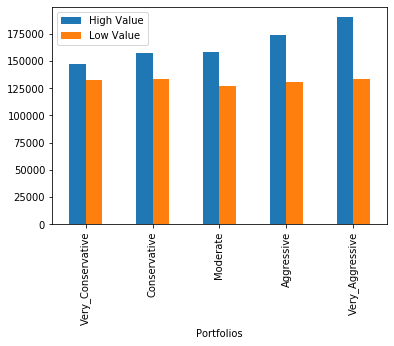

In [395]:
#1st Chart for the 5 portfolios

Portfolios = ['Very_Conservative','Conservative','Moderate','Aggressive','Very_Aggressive']
big_lst= []
for x in range(0,5):
    pv = 100000
    time_horizon = 8
    i = mean_list[x]
    vol = std_list[x]
    additions = 5000
    lst=[]
    for year in range(time_horizon):
        ending = pv * (1+i) + additions
        #print(locale.currency(ending, grouping=True))
        pv = ending
        lst.append(pv)

    high_value = lst[-1]   
    low_value = high_value *(1-max_list[x])
    new_lst = [Portfolios[x],high_value, low_value]
    big_lst.append(new_lst)
data = pd.DataFrame(big_lst)

data = data.rename(columns={0: 'Portfolios', 1: 'High Value',2:'Low Value'})

data = data.set_index('Portfolios')
ax = data.plot.bar()
print(data)
print(ax)

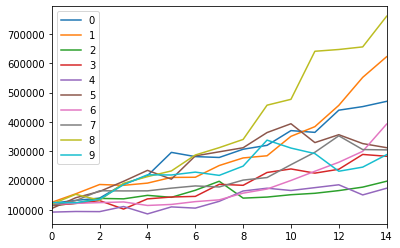

In [390]:
#MonteCarlo Simulation
sim = pd.DataFrame()
iterations = 1000

for x in range(iterations):

    expected_return = 0.073  # .0867 #Value based on selection
    volatility =  0.16 # .17 #Value based on selection
    time_horizon = 15
    pv = 100000
    annual_investment = 5000
    stream = []

    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return, volatility)) + annual_investment, 2)

        stream.append(end)

        pv = end

    sim[x] = stream
first_ten = list(range(10))
simOutput = sim[first_ten]


lines = simOutput.plot.line()

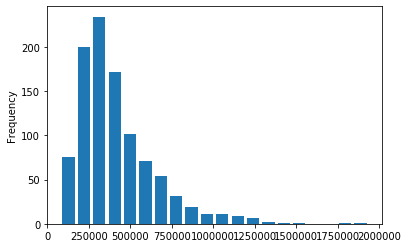

In [391]:
ending_values = sim.loc[time_horizon - 1]


ax = ending_values.plot.hist(bins=20,rwidth=0.8)

In [392]:
prob_of_success = (len(ending_values[ending_values > 500000]) / len(ending_values)) * 100
prob_of_success = "{0:.2f}".format(prob_of_success)
prob_of_success

'25.90'